In [1]:
import pandas as pd
import numpy as np
import pdb
import copy
import sys
sys.path.append('../ram_code/')

In [2]:
df = pd.read_csv('../data_sets/diabetes.csv', index_col=None)
#df.drop(['sales','salary'],axis=1,inplace=True)
#df.drop(['source','medium','channelGrouping','deviceCategory','country'],axis=1,inplace=True)
df = df.fillna(0)
target = 'Class'
print(df.shape)
df.head()

(768, 9)


,preg num,plasma conc,glucose test,triceps,serum,bmi,pedigree,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
num = int(0.9*df.shape[0])
train = df[:num]
test = df[num:]
modeltype='Classification'
sample_submission=''

Dataset Requires a Single_Label Type Solution
 Class  -> Counts -> Percent
     0:     454  ->   65.7%
     1:     237  ->   34.3%
    Selecting 2-Class Classifier...
    Target Class is already numeric. No Label Encoding
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
    0 variables removed since they were id or low-information variables
Test data has no missing values...
Number of numeric variables = 2
    Number of variables removed due to high correlation = 0 

Target Ready f

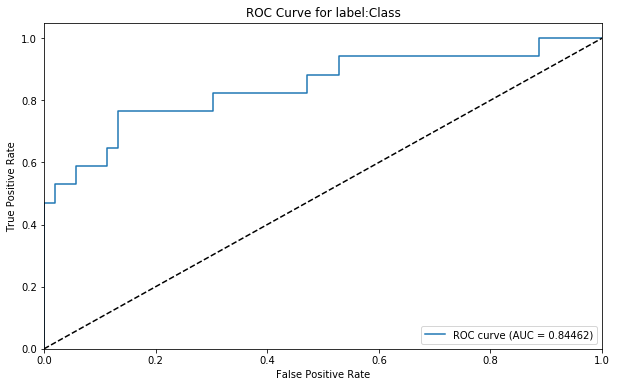

Average precision-recall score: 0.77
Weighted F1 score, averaged over all classes: 0.77


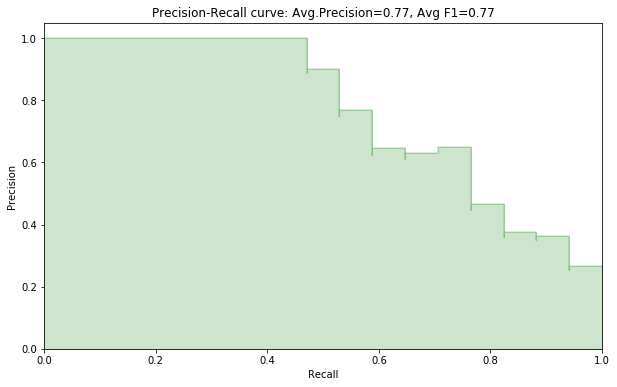

After multiple models, Ensemble Model Results:
    Accuracy Score = 87.1%
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.72      0.76      0.74        17

   micro avg       0.87      0.87      0.87        70
   macro avg       0.82      0.84      0.83        70
weighted avg       0.87      0.87      0.87        70

[[48  5]
 [ 4 13]]
Ensembling Models is better than Single Model for this data set.


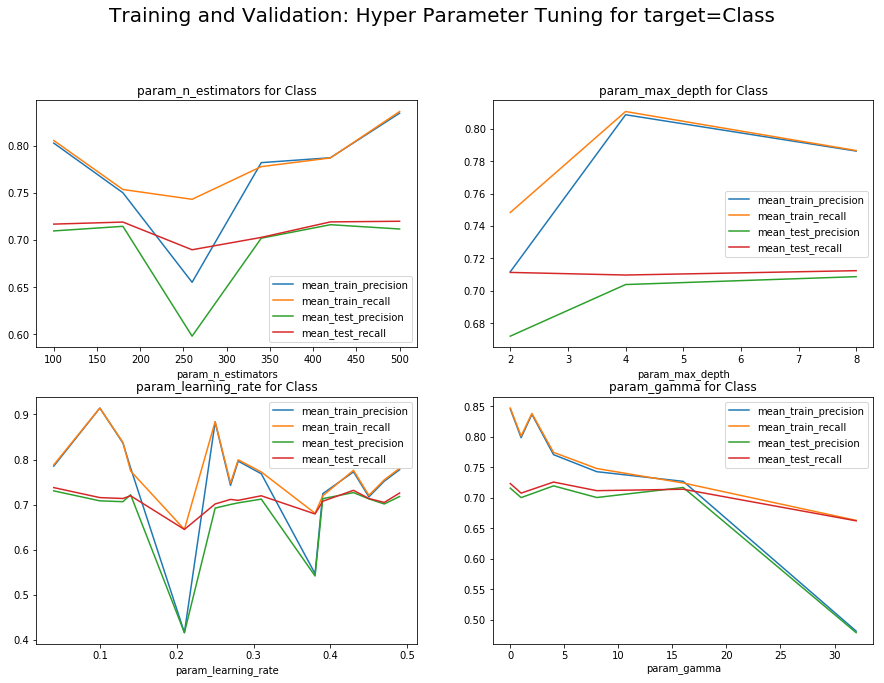

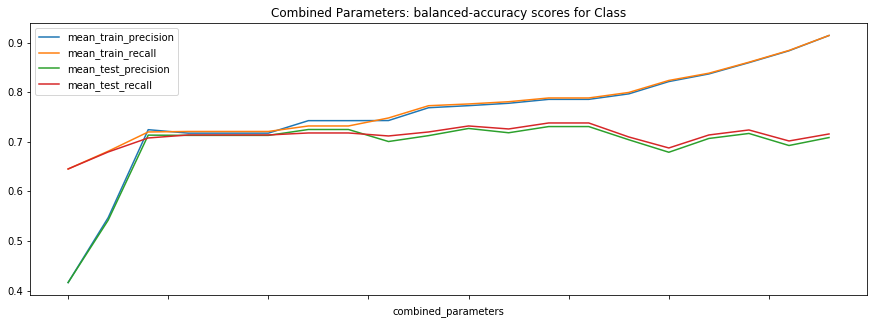

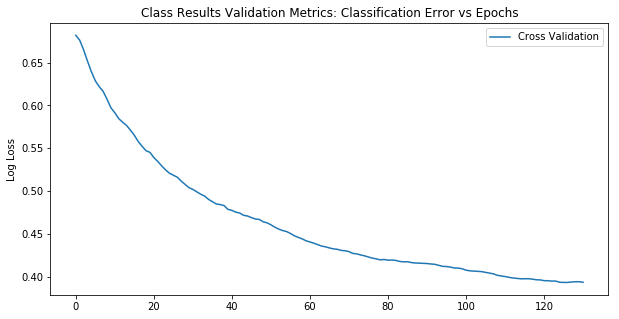

    Time taken for this Target (in seconds) = 10


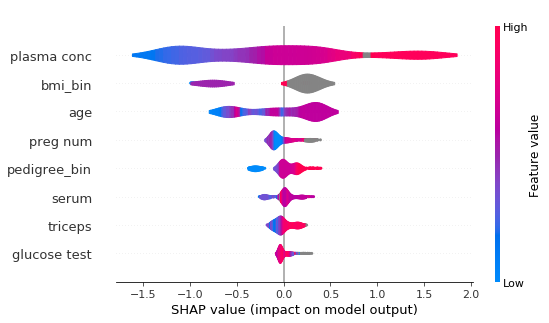

Plotting SHAP (SHapley Additive exPlanations) values to explain the output of model
Number of numeric variables = 2
    Number of variables removed due to high correlation = 0 
    Adding 6 categorical variables to reduced numeric variables  of 2
Selected No. of variables = 8 
Finding Important Features...
        in 8 variables
        in 6 variables
        in 4 variables
        in 2 variables
    Found 8 important features
Binning Top 2 continuous variables...
    Binning and replacing 2 numeric features.
Training Imbalanced Data set...
Downsampling selected since Imbalanced_Flag is set to True
Rare Class = 1
This is not an Imbalanced data set. Data Set shape = (691, 9)
  Rare Class rows in data set = 237
  Maximum Training Iterations = 1
    Training Batch Size = 691
    Training Batch incident rate: 34.3%
        Batch Training 1 completed
        Time Taken = 1 (in seconds)
    All downsampling steps completed. Discarding remainder=0 rows
This is where we predict on Test data us

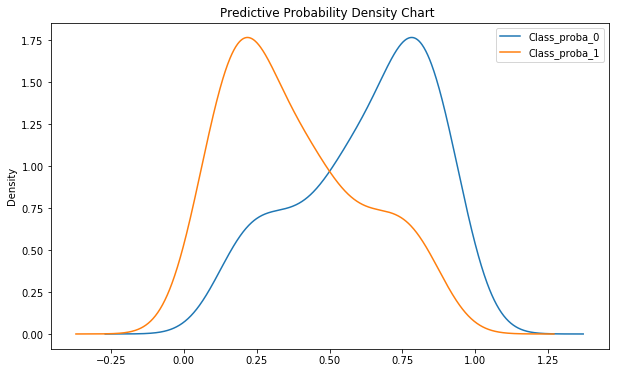

In [8]:
####################################################################################
####################################################################################
from Auto_ViML import Auto_ViML
#### If Boosting_Flag = True => XGBoost, False=>ExtraTrees, None=>Linear Model
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission, modeltype,
                          scoring_parameter='balanced-accuracy', Boosting_Flag=True, 
                                    Binning_Flag=True,
                                   Add_Poly=0, Stacking_Flag=False,
                                    Imbalanced_Flag=True, verbose=1)                  
######################################################################################                   
######################################################################################